In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math

In [2]:
train_data_path = "Data/webis-clickbait-22/train.jsonl"

In [3]:
# load data
df = pd.read_json(train_data_path, lines=True)
analyze_df = df[["postText", "targetParagraphs", "targetTitle", "targetDescription", "spoiler", "tags"]]

# Combine Texts
for c in ["postText", "targetParagraphs", "tags", "spoiler"]:
    analyze_df[c] = analyze_df[c].apply(lambda l: " ".join(l))

/var/folders/98/l3tmgppx20b3lw3c3zd59m9c0000gn/T/ipykernel_26028/4033789450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_df[c] = analyze_df[c].apply(lambda l: " ".join(l))


In [4]:
def plot_col_per_tag(title: str, df: pd.DataFrame, show_mean: bool = True):
    # num_per_ax = math.ceil(math.sqrt(len(char_lenghths.columns)-1))
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
    fig.tight_layout(pad=6.0)
    fig.suptitle(title, fontsize=16)

    axs = axs.flat
    for column, ax in zip(df.columns, axs):
        if column != "tags":
            for tag in df.tags.unique():
                x = sorted(df[df["tags"]==tag][column].values)
                y = np.arange(len(x))
                ax.plot(x,y, label=tag)
                if show_mean:
                    ax.axvline(x=np.nanmean(x), color="black", linestyle=":")
            ax.legend()
            ax.set_title(column)
            ax.set_xlabel("Lenghth")
            ax.set_ylabel("Spoiler")
    plt.show()

# Type distribution

<AxesSubplot: xlabel='tags'>

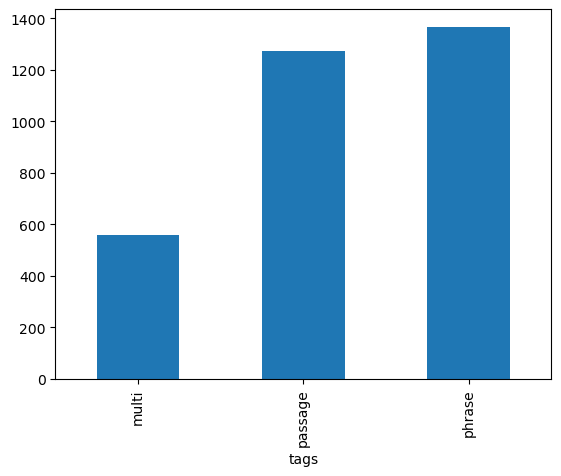

In [5]:
# num spoiler per type
analyze_df.groupby("tags")["spoiler"].count().plot(kind="bar")

In [6]:
analyze_df.groupby("tags")["spoiler"].count()

tags
multi       559
passage    1274
phrase     1367
Name: spoiler, dtype: int64

# Char Length

In [7]:
char_lenghths = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(text) if text else 0)  # chars of strings
char_lenghths["tags"] = analyze_df["tags"]

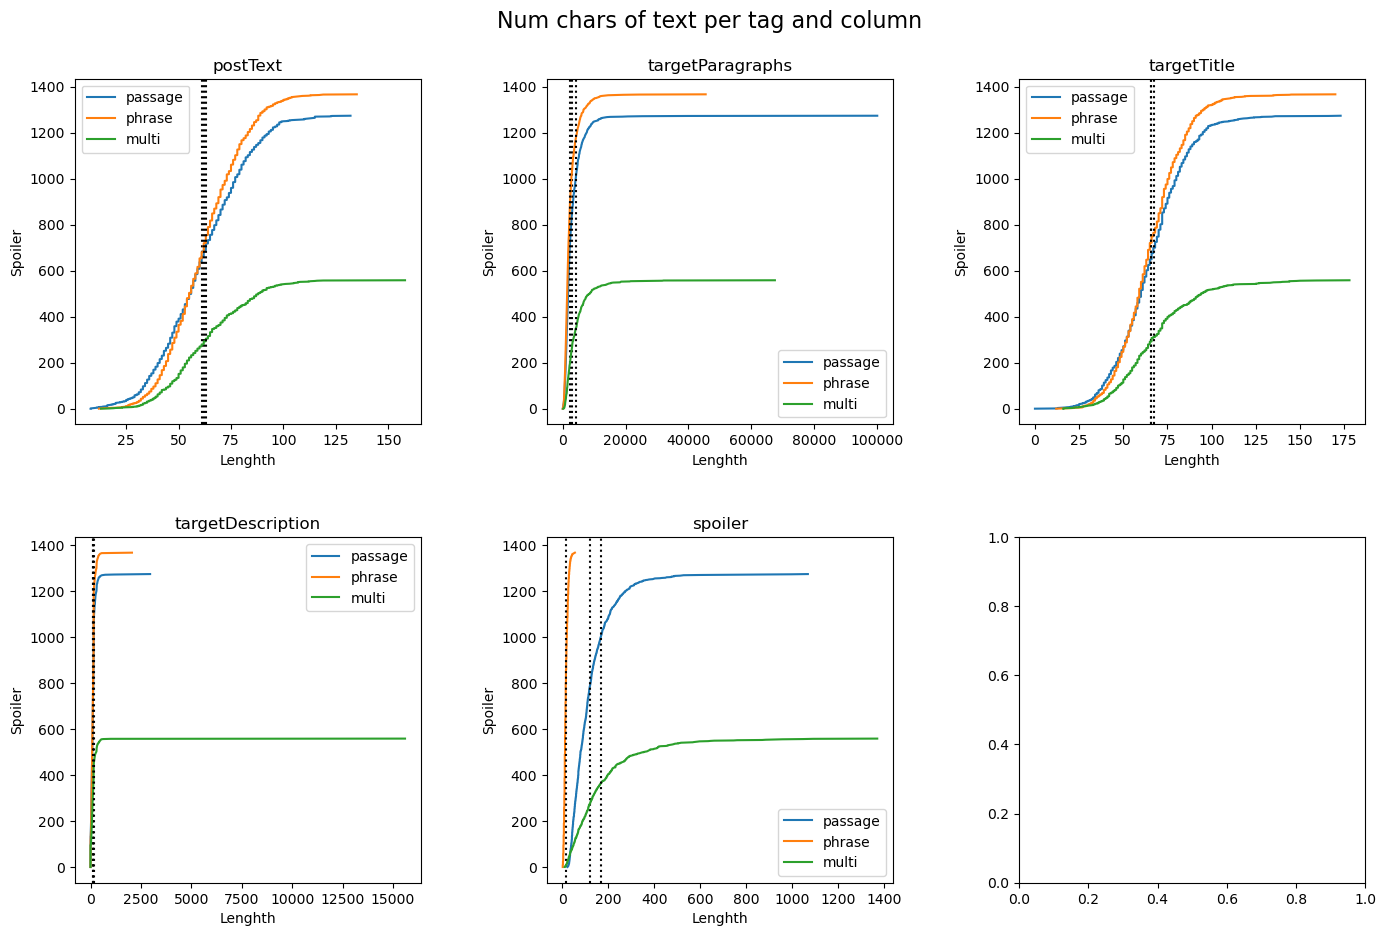

In [8]:
plot_col_per_tag(title="Num chars of text per tag and column", df=char_lenghths, show_mean=True)

# Token Lenghth

In [9]:
token_lenghths = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(text.split(" ")) if text else 0)  # chars of strings
token_lenghths["tags"] = analyze_df["tags"]

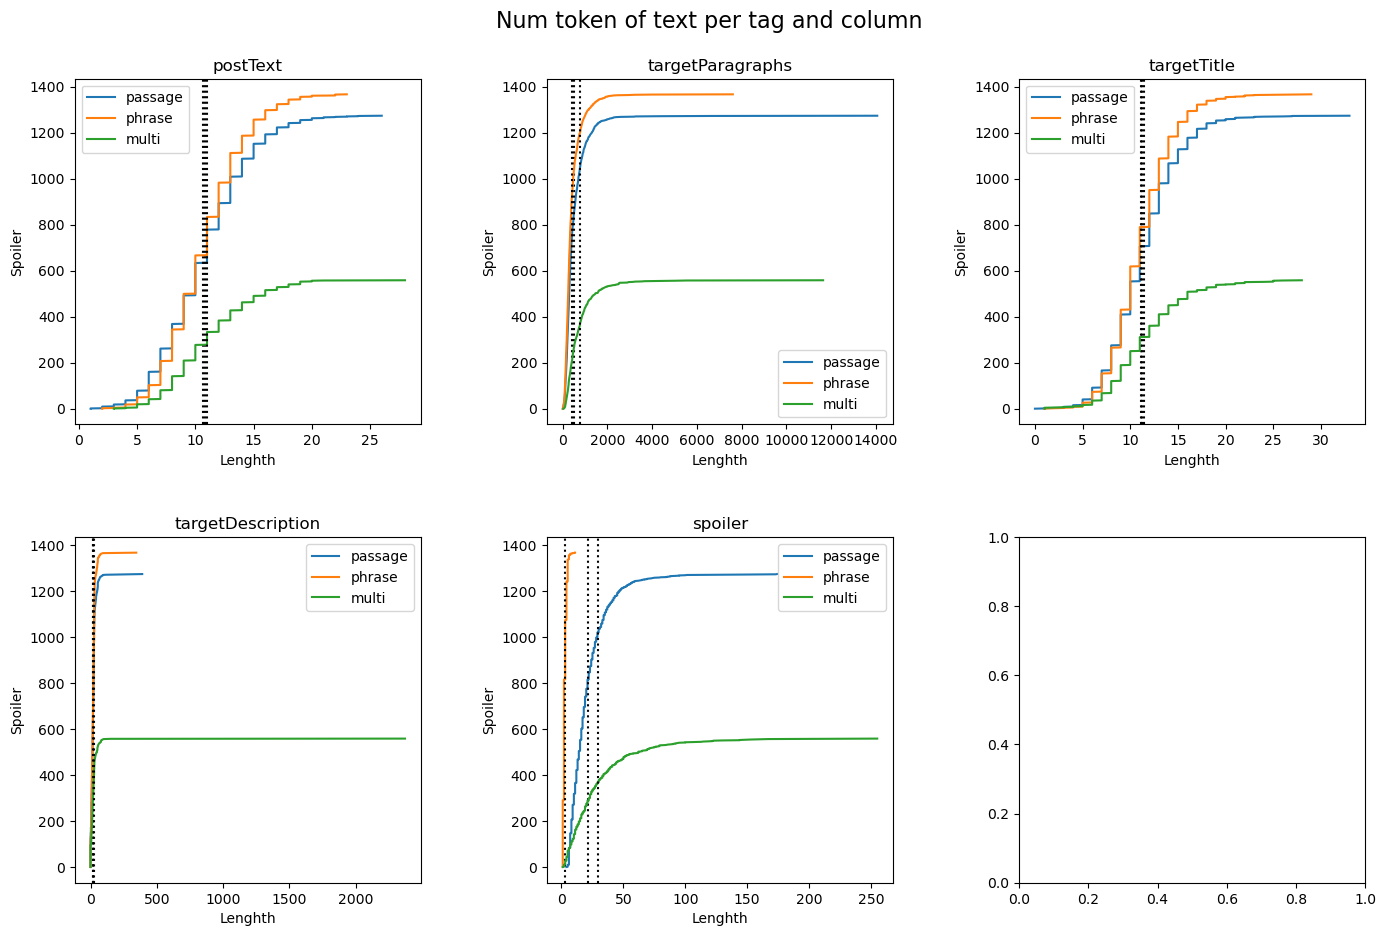

In [10]:
plot_col_per_tag(title="Num token of text per tag and column", df=token_lenghths, show_mean=True)

# Number od numbers in general

In [11]:
numb_lenghths = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(re.findall(r"\d+", str(text))) if text else 0)  # chars of strings
numb_lenghths["tags"] = analyze_df["tags"]

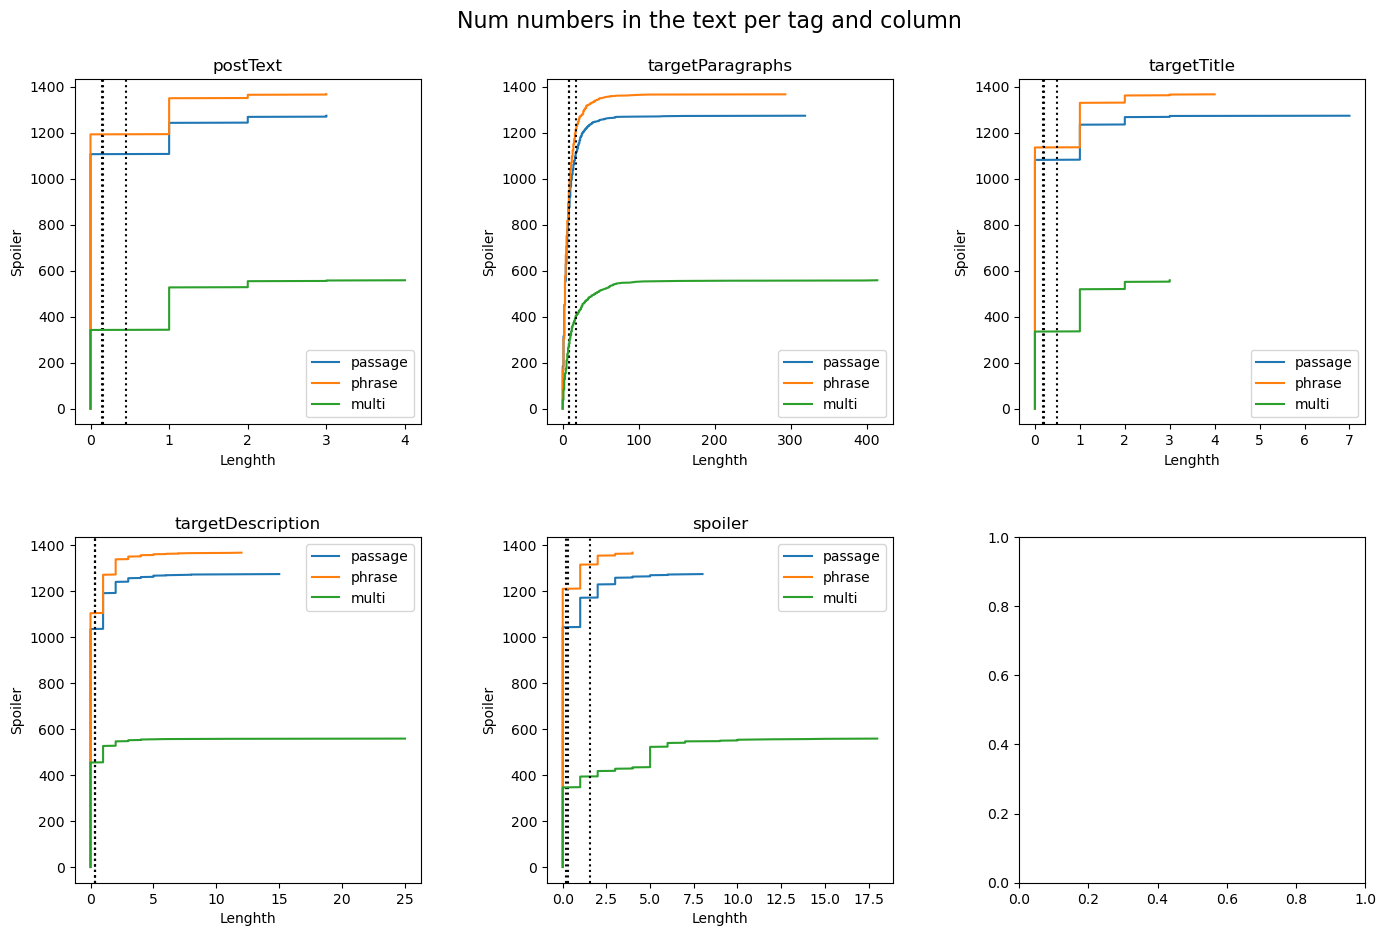

In [12]:
plot_col_per_tag(title="Num numbers in the text per tag and column", df=numb_lenghths, show_mean=True)

# Number of enumeration numbers (single numbers)

In [13]:
enumeration_df = analyze_df.loc[:, analyze_df.columns != 'tags'].applymap(lambda text: len(re.findall(r"([^\d]|^)\d[^\d]", str(text))) if text else 0)  # chars of strings
enumeration_df["tags"] = analyze_df["tags"]

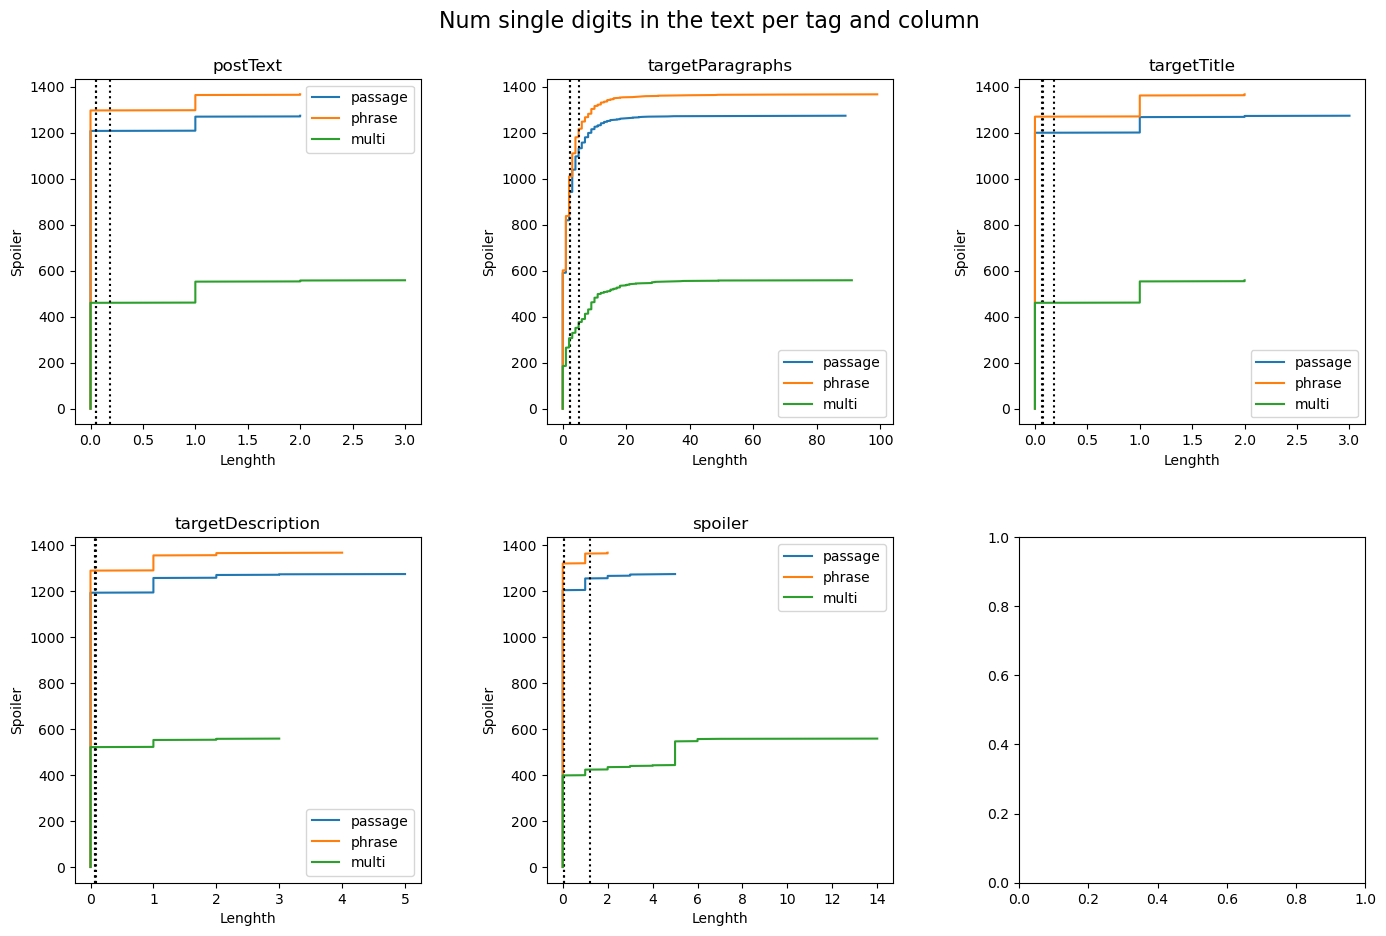

In [15]:
plot_col_per_tag(title="Num single digits in the text per tag and column", df=enumeration_df, show_mean=True)